# Sentiment Analysis
Vamos a importar el corpus porque aquí el orden de las palabras importan. Usaremos textblob que a su vez está construido encima de nltk para hacer el procesamiento de natural language.
 

In [42]:
from textblob import TextBlob
import pandas as pd

df = pd.read_pickle('./pickles/df_corpus.pkl')
df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [44]:
#Creamos una lambda para encapsular la funcion .sentiment del TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['transcript'].apply(pol)
df['subjetivity'] = df['transcript'].apply(sub)
df

,transcript,full_name,polarity,subjetivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004069,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039378,0.547370
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081962,0.483122
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


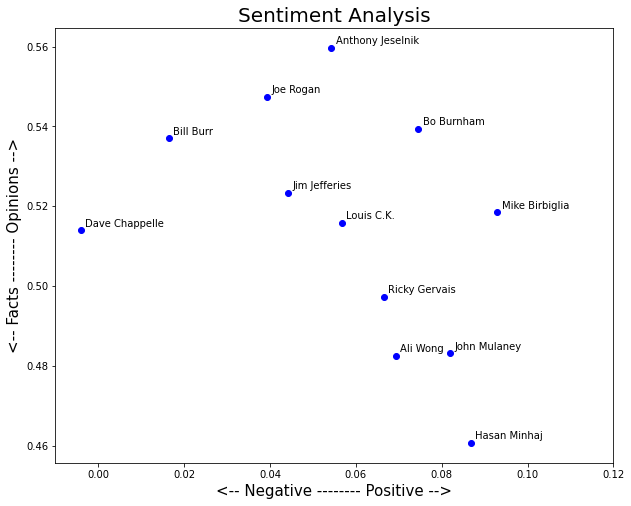

In [47]:
#Ploteamos la data
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

for i, comedian in enumerate(df.index):
    x = df.polarity.loc[comedian]
    y = df.subjetivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.001, y+0.001, df.full_name[i], fontsize=10)
    plt.xlim(-0.01, .12)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

# Sentiment over time on the show
Analizando el sentimiento dado por TextBulb a través del tiempo (divididos en pedazos)


In [63]:
import numpy as np
import math

def split_text(text, n=10):
    ''' Split text into n equal parts returning a list of the split parts'''
    length = len(text)
    return [text[i*length//n: (i+1)*length//n] for i in range(n)]




In [67]:

list_pieces = []
for t in df.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
print(len(list_pieces)) #Debe retornar 12 por cada transcript de cada comediante
print(len(list_pieces[0])) #Debe retornar 10 por cada chunk de cada transcript

12
10


In [73]:
#Calculado la polaridad por cada chunk
list_polarity = []
for lp in list_pieces:
    polarity_comedian = []
    for p in lp:
        polarity_comedian.append(TextBlob(p).sentiment.polarity)
    list_polarity.append(polarity_comedian)

    
print(len(list_polarity))
print(len(list_polarity[0]))

12
10


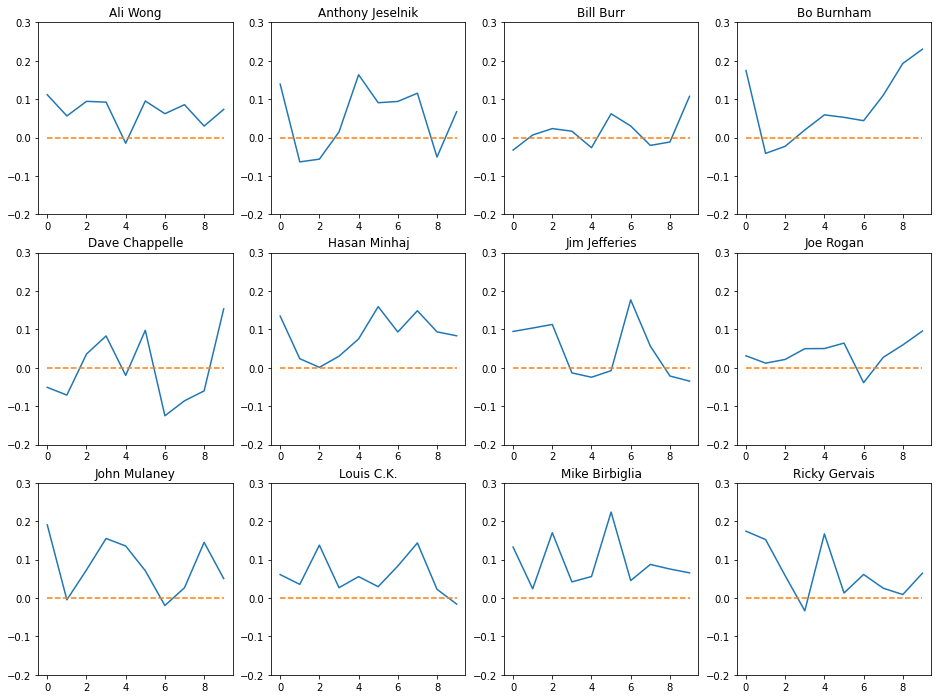

In [75]:
#Ploteamos por cada comediante
plt.rcParams['figure.figsize'] = (16, 12)

for i, comedian in enumerate(df.index):
    plt.subplot(3, 4, i+1)
    plt.plot(list_polarity[i])
    plt.plot(np.zeros(10), '--')
    plt.title(df.full_name[i])
    plt.ylim(-0.2, 0.3)

plt.show()